<a href="https://colab.research.google.com/github/RekhaS02/ML-Mini-Project/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/mini project/data.csv')

In [ ]:
dataset.head()

,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,M,44,6.8,64,4.9,4.9,2.8,2.0,1.8,1.2,21.0,N
1,F,35,3.9,38,5.4,3.8,5.9,0.5,4.3,1.0,22.0,N
2,M,40,5.0,63,4.0,4.8,2.5,1.1,2.7,1.1,23.0,N
3,F,35,2.8,50,5.0,4.7,2.5,1.3,2.4,1.1,20.0,N
4,F,42,2.1,45,4.9,3.0,1.1,1.1,1.4,1.4,21.0,N


In [ ]:
X = dataset.iloc[:, :-1]


In [ ]:
y = dataset.iloc[:, -1]

In [ ]:
print(X)

    Gender  Age  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0        M   44   6.8  64    4.9   4.9  2.8  2.0  1.8   1.2  21.0
1        F   35   3.9  38    5.4   3.8  5.9  0.5  4.3   1.0  22.0
2        M   40   5.0  63    4.0   4.8  2.5  1.1  2.7   1.1  23.0
3        F   35   2.8  50    5.0   4.7  2.5  1.3  2.4   1.1  20.0
4        F   42   2.1  45    4.9   3.0  1.1  1.1  1.4   1.4  21.0
..     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...
995      F   52   4.7  34    9.9   5.1  4.5  0.6  2.7   2.0  26.0
996      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5
997      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0
998      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4
999      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2

[1000 rows x 11 columns]


In [ ]:
print(y)

0      N
1      N
2      N
3      N
4      N
      ..
995    Y
996    Y
997    Y
998    Y
999    Y
Name: Class, Length: 1000, dtype: object


## Data Encoding

In [ ]:
X_encoded = pd.get_dummies(X, columns=['Gender'])

In [ ]:
print(X_encoded)

     Age  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Gender_F  \
0     44   6.8  64    4.9   4.9  2.8  2.0  1.8   1.2  21.0     False   
1     35   3.9  38    5.4   3.8  5.9  0.5  4.3   1.0  22.0      True   
2     40   5.0  63    4.0   4.8  2.5  1.1  2.7   1.1  23.0     False   
3     35   2.8  50    5.0   4.7  2.5  1.3  2.4   1.1  20.0      True   
4     42   2.1  45    4.9   3.0  1.1  1.1  1.4   1.4  21.0      True   
..   ...   ...  ..    ...   ...  ...  ...  ...   ...   ...       ...   
995   52   4.7  34    9.9   5.1  4.5  0.6  2.7   2.0  26.0      True   
996   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5     False   
997   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0     False   
998   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4     False   
999   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2     False   

     Gender_M  Gender_f  
0        True     False  
1       False     False  
2        True     False  
3       False     False  
4    

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

## Standard Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
print(X_scaled)

[[-1.08336248  0.57103945 -0.08244551 ... -0.87566229  0.87744601
  -0.0316386 ]
 [-2.10668976 -0.4174742  -0.51610592 ...  1.14199276 -1.13967126
  -0.0316386 ]
 [-1.5381746  -0.04252074 -0.09912476 ... -0.87566229  0.87744601
  -0.0316386 ]
 ...
 [ 0.05366783 -0.04252074 -0.03240778 ... -0.87566229  0.87744601
  -0.0316386 ]
 [-2.67520491  0.67329948  0.20110167 ... -0.87566229  0.87744601
  -0.0316386 ]
 [-2.56150188 -0.72425429 -0.1491625  ... -0.87566229  0.87744601
  -0.0316386 ]]


## ANOVA F-Value Feature Selection

In [ ]:
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_scaled, y_encoded)

# Assuming X_selected are the features after selection and y is the target


from imblearn.over_sampling import SMOTE

# Perform SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y_encoded)


In [ ]:
selected_features = selector.get_support()
feature_names = X_encoded.columns
selected_feature_names = feature_names[selected_features]

print("Selected Features: ")
for feature in selected_feature_names:
    print(feature)

print(X_selected)

Selected Features: 
Age
HbA1c
Chol
TG
BMI
[[-1.08336248 -1.3349833   0.02857612  0.32159797 -1.72947219]
 [-2.10668976 -1.13756831 -0.81687114  2.53513226 -1.52785548]
 [-1.5381746  -1.69033027 -0.04828272  0.10738497 -1.32623876]
 ...
 [ 0.05366783 -0.54532336 -0.81687114 -0.46384968  0.68992836]
 [-2.67520491 -0.62428935 -0.58629461 -0.89227567 -0.43912523]
 [-2.56150188  1.58675847 -0.58629461 -0.10682802  1.53671855]]


## Training and Test Data Allocation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training and Prediction

## Hyperparameter Optimization

In [ ]:
param_grid = [
    {   'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 0
)

In [ ]:
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 1}


## Training

In [ ]:
svm = SVC(C = 100, gamma = 0.1, kernel = 'rbf')
svm.fit(X_train, y_train)

SVC(C=100, gamma=0.1)

## Prediction

In [ ]:
y_pred = svm.predict(X_test)

# Results

## Decoding

In [ ]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

## Confusion Matrix

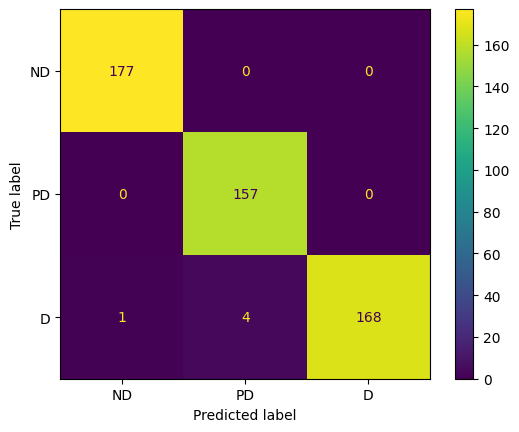

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Added a fourth label to match the number of classes
cm_fig = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['ND', 'PD', 'D'])
cm_fig.plot()
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test_decoded, y_pred_decoded))
# Precision
precision = precision_score(y_test, y_pred, average='weighted')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


              precision    recall  f1-score   support

           N       0.99      1.00      1.00       177
           P       0.98      1.00      0.99       157
           Y       1.00      0.97      0.99       173

    accuracy                           0.99       507
   macro avg       0.99      0.99      0.99       507
weighted avg       0.99      0.99      0.99       507

Precision: 0.9903
Recall: 0.9901
F1 Score: 0.9901
Accuracy: 0.9901
